In [8]:
import pandas as pd

In [9]:
#save filepath to variable for easier access
fluprint_export_path = 'C:\\Users\\indra\\OneDrive\\Bureaublad\\LSAoBD.practicals\\R Project\\fluprint_export.csv'
#read and store data in dataframe fluprint_data
fluprint_data = pd.read_csv(fluprint_export_path)
#summary of data
fluprint_data.describe()
fluprint_data.describe(include='all').loc[:, ['geo_mean', 'vaccine_response', 'name_formatted']]

,geo_mean,vaccine_response,name_formatted
count,156118.000000,112456.000000,156118
unique,NaN,NaN,3283
top,NaN,NaN,L50_FASL
freq,NaN,NaN,555
mean,30.242540,0.300927,NaN
std,40.040675,0.458663,NaN
min,0.000000,0.000000,NaN
25%,2.150000,0.000000,NaN
50%,20.000000,0.000000,NaN
75%,47.570000,1.000000,NaN


In [10]:
fluprint_data.head()

,donor_id,study_id,gender,race,visit_id,visit_year,visit_day,visit_type_hai,visit_age,cmv_status,...,vaccinated_2yr_prior,vaccine_type_2yr_prior,vaccinated_3yr_prior,vaccine_type_3yr_prior,vaccinated_4yr_prior,vaccine_type_4yr_prior,vaccinated_5yr_prior,vaccine_type_5yr_prior,influenza_infection_history,influenza_hospitalization
0,813,15,Female,Caucasian,2937,2014,0,pre,23.0,0.0,...,1.0,2.0,1.0,2.0,1.0,2.0,1.0,2.0,0,0
1,813,15,Female,Caucasian,2937,2014,0,pre,23.0,0.0,...,1.0,2.0,1.0,2.0,1.0,2.0,1.0,2.0,0,0
2,813,15,Female,Caucasian,2937,2014,0,pre,23.0,0.0,...,1.0,2.0,1.0,2.0,1.0,2.0,1.0,2.0,0,0
3,813,15,Female,Caucasian,2937,2014,0,pre,23.0,0.0,...,1.0,2.0,1.0,2.0,1.0,2.0,1.0,2.0,0,0
4,813,15,Female,Caucasian,2937,2014,0,pre,23.0,0.0,...,1.0,2.0,1.0,2.0,1.0,2.0,1.0,2.0,0,0


In [11]:
fluprint_data.columns

Index(['donor_id', 'study_id', 'gender', 'race', 'visit_id', 'visit_year',
       'visit_day', 'visit_type_hai', 'visit_age', 'cmv_status', 'ebv_status',
       'bmi', 'vaccine', 'geo_mean', 'd_geo_mean', 'vaccine_response',
       'mesurment_id', 'assay', 'name', 'name_formatted', 'subset', 'units',
       'data', 'statin_use', 'flu_vaccination_history',
       'total_vaccines_received', 'vaccinated_1yr_prior',
       'vaccine_type_1yr_prior', 'vaccinated_2yr_prior',
       'vaccine_type_2yr_prior', 'vaccinated_3yr_prior',
       'vaccine_type_3yr_prior', 'vaccinated_4yr_prior',
       'vaccine_type_4yr_prior', 'vaccinated_5yr_prior',
       'vaccine_type_5yr_prior', 'influenza_infection_history',
       'influenza_hospitalization'],
      dtype='object')

In [12]:
selected_columns = ['geo_mean', 'vaccine_response', 'name_formatted']
total_datapoints = fluprint_data[selected_columns].size
total_datapoints

468354

In [13]:
fluprint_data['geo_mean_before'] = fluprint_data['geo_mean'] - fluprint_data['d_geo_mean']
fluprint_data['geo_mean_fold_change'] = fluprint_data['geo_mean'] / fluprint_data['geo_mean_before']
fluprint_data.loc[:, ['geo_mean', 'd_geo_mean', 'geo_mean_before', 'geo_mean_fold_change', 'vaccine_response']]

,geo_mean,d_geo_mean,geo_mean_before,geo_mean_fold_change,vaccine_response
0,380.55,1.0,379.55,1.002635,0.0
1,380.55,1.0,379.55,1.002635,0.0
2,380.55,1.0,379.55,1.002635,0.0
3,380.55,1.0,379.55,1.002635,0.0
4,380.55,1.0,379.55,1.002635,0.0
...,...,...,...,...,...
156113,0.00,226.0,-226.00,-0.000000,NaN
156114,0.00,226.0,-226.00,-0.000000,NaN
156115,0.00,226.0,-226.00,-0.000000,NaN
156116,0.00,226.0,-226.00,-0.000000,NaN


In [14]:
high_responders = fluprint_data[(fluprint_data['geo_mean'] >= 40) & (fluprint_data['geo_mean_fold_change'] >= 4)]
high_responders

,donor_id,study_id,gender,race,visit_id,visit_year,visit_day,visit_type_hai,visit_age,cmv_status,...,vaccinated_3yr_prior,vaccine_type_3yr_prior,vaccinated_4yr_prior,vaccine_type_4yr_prior,vaccinated_5yr_prior,vaccine_type_5yr_prior,influenza_infection_history,influenza_hospitalization,geo_mean_before,geo_mean_fold_change


In [15]:
high_responders = fluprint_data[fluprint_data['vaccine_response'] == 1]
num_high_responders = len(high_responders)
num_high_responders

33841

In [16]:
high_responders.loc[:, ['geo_mean', 'd_geo_mean', 'geo_mean_before', 'geo_mean_fold_change', 'vaccine_response']]

,geo_mean,d_geo_mean,geo_mean_before,geo_mean_fold_change,vaccine_response
1120,190.27,6.0,184.27,1.032561,1.0
1121,190.27,6.0,184.27,1.032561,1.0
1122,190.27,6.0,184.27,1.032561,1.0
1123,190.27,6.0,184.27,1.032561,1.0
1124,190.27,6.0,184.27,1.032561,1.0
...,...,...,...,...,...
151889,56.57,7.0,49.57,1.141214,1.0
151890,56.57,7.0,49.57,1.141214,1.0
151891,56.57,7.0,49.57,1.141214,1.0
151892,56.57,7.0,49.57,1.141214,1.0


In [17]:
high_responders = fluprint_data[(fluprint_data['geo_mean'] >= 40) & (fluprint_data['d_geo_mean'] >= 4)]
num_high_responders = len(high_responders)
num_high_responders

13921

In [18]:
vaccine_response_zero = high_responders.loc[high_responders['vaccine_response'] == 0, 
                                             ['geo_mean', 'd_geo_mean', 'geo_mean_before', 'geo_mean_fold_change', 'vaccine_response']]

vaccine_response_zero

,geo_mean,d_geo_mean,geo_mean_before,geo_mean_fold_change,vaccine_response
1552,226.27,4.0,222.27,1.017996,0.0
1553,226.27,4.0,222.27,1.017996,0.0
1554,226.27,4.0,222.27,1.017996,0.0
1555,226.27,4.0,222.27,1.017996,0.0
1556,226.27,4.0,222.27,1.017996,0.0
...,...,...,...,...,...
146434,113.14,7.0,106.14,1.065951,0.0
146435,113.14,7.0,106.14,1.065951,0.0
146436,113.14,7.0,106.14,1.065951,0.0
146437,113.14,7.0,106.14,1.065951,0.0


In [19]:
fluprint_data.dropna(subset=['vaccine_response'], inplace=True)
fluprint_data

,donor_id,study_id,gender,race,visit_id,visit_year,visit_day,visit_type_hai,visit_age,cmv_status,...,vaccinated_3yr_prior,vaccine_type_3yr_prior,vaccinated_4yr_prior,vaccine_type_4yr_prior,vaccinated_5yr_prior,vaccine_type_5yr_prior,influenza_infection_history,influenza_hospitalization,geo_mean_before,geo_mean_fold_change
0,813,15,Female,Caucasian,2937,2014,0,pre,23.00,0.0,...,1.0,2.0,1.0,2.0,1.0,2.0,0,0,379.55,1.002635
1,813,15,Female,Caucasian,2937,2014,0,pre,23.00,0.0,...,1.0,2.0,1.0,2.0,1.0,2.0,0,0,379.55,1.002635
2,813,15,Female,Caucasian,2937,2014,0,pre,23.00,0.0,...,1.0,2.0,1.0,2.0,1.0,2.0,0,0,379.55,1.002635
3,813,15,Female,Caucasian,2937,2014,0,pre,23.00,0.0,...,1.0,2.0,1.0,2.0,1.0,2.0,0,0,379.55,1.002635
4,813,15,Female,Caucasian,2937,2014,0,pre,23.00,0.0,...,1.0,2.0,1.0,2.0,1.0,2.0,0,0,379.55,1.002635
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155973,2,30,Male,Caucasian,2,2014,1,pre,1.23,1.0,...,0.0,NaN,0.0,NaN,0.0,NaN,0,0,14.82,1.134953
155974,2,30,Male,Caucasian,2,2014,1,pre,1.23,1.0,...,0.0,NaN,0.0,NaN,0.0,NaN,0,0,14.82,1.134953
155975,2,30,Male,Caucasian,2,2014,1,pre,1.23,1.0,...,0.0,NaN,0.0,NaN,0.0,NaN,0,0,14.82,1.134953
155976,2,30,Male,Caucasian,2,2014,1,pre,1.23,1.0,...,0.0,NaN,0.0,NaN,0.0,NaN,0,0,14.82,1.134953


In [20]:
print(fluprint_data['vaccine_response'].isna().sum())

0


In [21]:
fluprint_data

,donor_id,study_id,gender,race,visit_id,visit_year,visit_day,visit_type_hai,visit_age,cmv_status,...,vaccinated_3yr_prior,vaccine_type_3yr_prior,vaccinated_4yr_prior,vaccine_type_4yr_prior,vaccinated_5yr_prior,vaccine_type_5yr_prior,influenza_infection_history,influenza_hospitalization,geo_mean_before,geo_mean_fold_change
0,813,15,Female,Caucasian,2937,2014,0,pre,23.00,0.0,...,1.0,2.0,1.0,2.0,1.0,2.0,0,0,379.55,1.002635
1,813,15,Female,Caucasian,2937,2014,0,pre,23.00,0.0,...,1.0,2.0,1.0,2.0,1.0,2.0,0,0,379.55,1.002635
2,813,15,Female,Caucasian,2937,2014,0,pre,23.00,0.0,...,1.0,2.0,1.0,2.0,1.0,2.0,0,0,379.55,1.002635
3,813,15,Female,Caucasian,2937,2014,0,pre,23.00,0.0,...,1.0,2.0,1.0,2.0,1.0,2.0,0,0,379.55,1.002635
4,813,15,Female,Caucasian,2937,2014,0,pre,23.00,0.0,...,1.0,2.0,1.0,2.0,1.0,2.0,0,0,379.55,1.002635
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155973,2,30,Male,Caucasian,2,2014,1,pre,1.23,1.0,...,0.0,NaN,0.0,NaN,0.0,NaN,0,0,14.82,1.134953
155974,2,30,Male,Caucasian,2,2014,1,pre,1.23,1.0,...,0.0,NaN,0.0,NaN,0.0,NaN,0,0,14.82,1.134953
155975,2,30,Male,Caucasian,2,2014,1,pre,1.23,1.0,...,0.0,NaN,0.0,NaN,0.0,NaN,0,0,14.82,1.134953
155976,2,30,Male,Caucasian,2,2014,1,pre,1.23,1.0,...,0.0,NaN,0.0,NaN,0.0,NaN,0,0,14.82,1.134953


In [22]:
filtered_names = fluprint_data[fluprint_data['units'] == '% of Parent']
unique_names = filtered_names['name_formatted'].unique()
unique_names_count = len(unique_names)
unique_names_count

411

In [23]:
# Then, access the 'name_formatted' column and count occurrences
most_abundant_cell_type = filtered_names['data'].idxmax()  # Get the name of the most frequent cell type
most_abundant_value = filtered_names.loc[most_abundant_cell_type, 'data']    # Get its count
cell_type = filtered_names.loc[most_abundant_cell_type, 'name_formatted']
# Print the result
print(f"The most abundant cell type is: {cell_type}")
print(f"It's value is {most_abundant_value}.")

The most abundant cell type is: IFNa_B_cells
It's value is 100.0.


In [24]:
cell_type_count = filtered_names['name_formatted'].value_counts()
cell_type_count

name_formatted
CD8_pos_T_cells                       424
CD4_pos_T_cells                       398
T_cells                               398
B_cells                               346
NK_cells                              346
                                     ... 
PMA_Iono_effector_CD4_pos_T_cells      18
LPS_effector_CD4_pos_T_cells           18
IL_neg_7_effector_CD4_pos_T_cells      18
IL_neg_6_effector_CD4_pos_T_cells      18
IL_neg_10_effector_CD8_pos_T_cells     18
Name: count, Length: 411, dtype: int64

In [25]:
cell_type_response = filtered_names.groupby(['name_formatted', 'vaccine_response']).size().reset_index(name='count')
cell_type_response


,name_formatted,vaccine_response,count
0,B_cells,0.0,256
1,B_cells,1.0,90
2,CD161_neg_CD45RA_pos_Tregs,0.0,208
3,CD161_neg_CD45RA_pos_Tregs,1.0,86
4,CD161_pos_CD45RA_neg_Tregs,0.0,208
...,...,...,...
817,pDCs,1.0,50
818,plasmablasts,0.0,208
819,plasmablasts,1.0,86
820,transitional_B_cells,0.0,208


In [26]:
cell_type_response.loc[cell_type_response['name_formatted'] == 'CD8_pos_T_cells']

,name_formatted,vaccine_response,count
80,CD8_pos_T_cells,0.0,328
81,CD8_pos_T_cells,1.0,96


In [27]:
cell_type_response.loc[cell_type_response['name_formatted'] == 'IFNa_B_cells']

,name_formatted,vaccine_response,count
116,IFNa_B_cells,0.0,13
117,IFNa_B_cells,1.0,5


In [28]:
y = fluprint_data.vaccine_response

In [29]:
fluprint_data

,donor_id,study_id,gender,race,visit_id,visit_year,visit_day,visit_type_hai,visit_age,cmv_status,...,vaccinated_3yr_prior,vaccine_type_3yr_prior,vaccinated_4yr_prior,vaccine_type_4yr_prior,vaccinated_5yr_prior,vaccine_type_5yr_prior,influenza_infection_history,influenza_hospitalization,geo_mean_before,geo_mean_fold_change
0,813,15,Female,Caucasian,2937,2014,0,pre,23.00,0.0,...,1.0,2.0,1.0,2.0,1.0,2.0,0,0,379.55,1.002635
1,813,15,Female,Caucasian,2937,2014,0,pre,23.00,0.0,...,1.0,2.0,1.0,2.0,1.0,2.0,0,0,379.55,1.002635
2,813,15,Female,Caucasian,2937,2014,0,pre,23.00,0.0,...,1.0,2.0,1.0,2.0,1.0,2.0,0,0,379.55,1.002635
3,813,15,Female,Caucasian,2937,2014,0,pre,23.00,0.0,...,1.0,2.0,1.0,2.0,1.0,2.0,0,0,379.55,1.002635
4,813,15,Female,Caucasian,2937,2014,0,pre,23.00,0.0,...,1.0,2.0,1.0,2.0,1.0,2.0,0,0,379.55,1.002635
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155973,2,30,Male,Caucasian,2,2014,1,pre,1.23,1.0,...,0.0,NaN,0.0,NaN,0.0,NaN,0,0,14.82,1.134953
155974,2,30,Male,Caucasian,2,2014,1,pre,1.23,1.0,...,0.0,NaN,0.0,NaN,0.0,NaN,0,0,14.82,1.134953
155975,2,30,Male,Caucasian,2,2014,1,pre,1.23,1.0,...,0.0,NaN,0.0,NaN,0.0,NaN,0,0,14.82,1.134953
155976,2,30,Male,Caucasian,2,2014,1,pre,1.23,1.0,...,0.0,NaN,0.0,NaN,0.0,NaN,0,0,14.82,1.134953


In [30]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [31]:
def assess_data_quality(fluprint_data):
     # Check for duplicate rows
    print("\nDuplicate rows:", fluprint_data.duplicated().sum())
    
    # Check data types
    print("\nData types:\n", fluprint_data.dtypes)

# Perform data quality assessment
assess_data_quality(fluprint_data)


Duplicate rows: 0

Data types:
 donor_id                         int64
study_id                         int64
gender                          object
race                            object
visit_id                         int64
visit_year                       int64
visit_day                        int64
visit_type_hai                  object
visit_age                      float64
cmv_status                     float64
ebv_status                     float64
bmi                            float64
vaccine                        float64
geo_mean                       float64
d_geo_mean                     float64
vaccine_response               float64
mesurment_id                     int64
assay                            int64
name                            object
name_formatted                  object
subset                          object
units                           object
data                           float64
statin_use                     float64
flu_vaccination_history        

In [32]:
fluprint_data['vaccine_response'] = fluprint_data['vaccine_response'].astype('int64')
print(fluprint_data.dtypes)

donor_id                         int64
study_id                         int64
gender                          object
race                            object
visit_id                         int64
visit_year                       int64
visit_day                        int64
visit_type_hai                  object
visit_age                      float64
cmv_status                     float64
ebv_status                     float64
bmi                            float64
vaccine                        float64
geo_mean                       float64
d_geo_mean                     float64
vaccine_response                 int64
mesurment_id                     int64
assay                            int64
name                            object
name_formatted                  object
subset                          object
units                           object
data                           float64
statin_use                     float64
flu_vaccination_history        float64
total_vaccines_received  

In [33]:
columns_to_keep = ['donor_id', 'vaccine_response', 'name_formatted', 'subset', 'units', 'data']
fluprint_clean_data = fluprint_data[columns_to_keep]
fluprint_clean_data

,donor_id,vaccine_response,name_formatted,subset,units,data
0,813,0,B_cells,CD14-CD33-/CD3-/CD19+CD20+,% of Parent,34.40
1,813,0,basophils,CD123+HLADR-,% of Parent,1.45
2,813,0,CD16_pos_monocytes,CD14+CD33+/CD16+,% of Parent,5.85
3,813,0,CD16_pos_CD14_pos_monocytes,CD14+CD33+/CD14+CD16+,% of Parent,1.55
4,813,0,CD16_pos_CD14_neg_monocytes,CD14+CD33+/CD14-CD16+,% of Parent,4.46
...,...,...,...,...,...,...
155973,2,0,TNFB,TNFB,Z.log2,1.72
155974,2,0,TRAIL,TRAIL,Z.log2,0.42
155975,2,0,VCAM1,VCAM1,Z.log2,1.05
155976,2,0,VEGF,VEGF,Z.log2,0.54


In [34]:
fluprint_clean = fluprint_clean_data[fluprint_clean_data['units'] == '% of Parent']
fluprint_clean

,donor_id,vaccine_response,name_formatted,subset,units,data
0,813,0,B_cells,CD14-CD33-/CD3-/CD19+CD20+,% of Parent,34.40
1,813,0,basophils,CD123+HLADR-,% of Parent,1.45
2,813,0,CD16_pos_monocytes,CD14+CD33+/CD16+,% of Parent,5.85
3,813,0,CD16_pos_CD14_pos_monocytes,CD14+CD33+/CD14+CD16+,% of Parent,1.55
4,813,0,CD16_pos_CD14_neg_monocytes,CD14+CD33+/CD14-CD16+,% of Parent,4.46
...,...,...,...,...,...,...
155845,3,0,Th2_non_neg_TFH_CD8_pos_T_cells,CD14-CD33-/CD3+/CD4-CD8+/Non-naive CD8+/CXCR5-...,% of Parent,9.71
155846,3,0,Th2_TFH_CD4_pos_T_cells,CD14-CD33-/CD3+/CD4+CD8-/Non-naive CD4+/CXCR5+...,% of Parent,34.90
155847,3,0,Th2_TFH_CD8_pos_T_cells,CD14-CD33-/CD3+/CD4-CD8+/Non-naive CD8+/CXCR5+...,% of Parent,1.84
155848,3,0,transitional_B_cells,CD14-CD33-/CD3-/CD19+CD20+/CD24+CD38+,% of Parent,6.51


In [35]:
count = (fluprint_data['units'] == '% of Parent').sum()
print(f"Number of rows where 'unit' is '% of parent': {count}")

Number of rows where 'unit' is '% of parent': 25313


In [36]:
fluprint_clean.reset_index()

,index,donor_id,vaccine_response,name_formatted,subset,units,data
0,0,813,0,B_cells,CD14-CD33-/CD3-/CD19+CD20+,% of Parent,34.40
1,1,813,0,basophils,CD123+HLADR-,% of Parent,1.45
2,2,813,0,CD16_pos_monocytes,CD14+CD33+/CD16+,% of Parent,5.85
3,3,813,0,CD16_pos_CD14_pos_monocytes,CD14+CD33+/CD14+CD16+,% of Parent,1.55
4,4,813,0,CD16_pos_CD14_neg_monocytes,CD14+CD33+/CD14-CD16+,% of Parent,4.46
...,...,...,...,...,...,...,...
25308,155845,3,0,Th2_non_neg_TFH_CD8_pos_T_cells,CD14-CD33-/CD3+/CD4-CD8+/Non-naive CD8+/CXCR5-...,% of Parent,9.71
25309,155846,3,0,Th2_TFH_CD4_pos_T_cells,CD14-CD33-/CD3+/CD4+CD8-/Non-naive CD4+/CXCR5+...,% of Parent,34.90
25310,155847,3,0,Th2_TFH_CD8_pos_T_cells,CD14-CD33-/CD3+/CD4-CD8+/Non-naive CD8+/CXCR5+...,% of Parent,1.84
25311,155848,3,0,transitional_B_cells,CD14-CD33-/CD3-/CD19+CD20+/CD24+CD38+,% of Parent,6.51


In [37]:
fluprint_clean_pivot = fluprint_clean.pivot(index='donor_id', columns='name_formatted', values='data').reset_index()

ValueError: Index contains duplicate entries, cannot reshape

In [38]:
fluprint_clean

,donor_id,vaccine_response,name_formatted,subset,units,data
0,813,0,B_cells,CD14-CD33-/CD3-/CD19+CD20+,% of Parent,34.40
1,813,0,basophils,CD123+HLADR-,% of Parent,1.45
2,813,0,CD16_pos_monocytes,CD14+CD33+/CD16+,% of Parent,5.85
3,813,0,CD16_pos_CD14_pos_monocytes,CD14+CD33+/CD14+CD16+,% of Parent,1.55
4,813,0,CD16_pos_CD14_neg_monocytes,CD14+CD33+/CD14-CD16+,% of Parent,4.46
...,...,...,...,...,...,...
155845,3,0,Th2_non_neg_TFH_CD8_pos_T_cells,CD14-CD33-/CD3+/CD4-CD8+/Non-naive CD8+/CXCR5-...,% of Parent,9.71
155846,3,0,Th2_TFH_CD4_pos_T_cells,CD14-CD33-/CD3+/CD4+CD8-/Non-naive CD4+/CXCR5+...,% of Parent,34.90
155847,3,0,Th2_TFH_CD8_pos_T_cells,CD14-CD33-/CD3+/CD4-CD8+/Non-naive CD8+/CXCR5+...,% of Parent,1.84
155848,3,0,transitional_B_cells,CD14-CD33-/CD3-/CD19+CD20+/CD24+CD38+,% of Parent,6.51


In [45]:
fluprint_clean = fluprint_clean.pivot(index='donor_id', columns='name_formatted', values='data')

ValueError: Index contains duplicate entries, cannot reshape

In [54]:
z_scores = stats.zscore(fluprint_clean['data'])
outliers = (np.abs(z_scores) > 3).sum(axis=0)
print("\nNumber of outliers (Z-score > 3):\n", outliers)


Number of outliers (Z-score > 3):
 0


In [55]:
class_balance = fluprint_clean['vaccine_response'].value_counts(normalize=True)
print("\nClass balance:\n", class_balance)


Class balance:
 vaccine_response
0    0.717023
1    0.282977
Name: proportion, dtype: float64


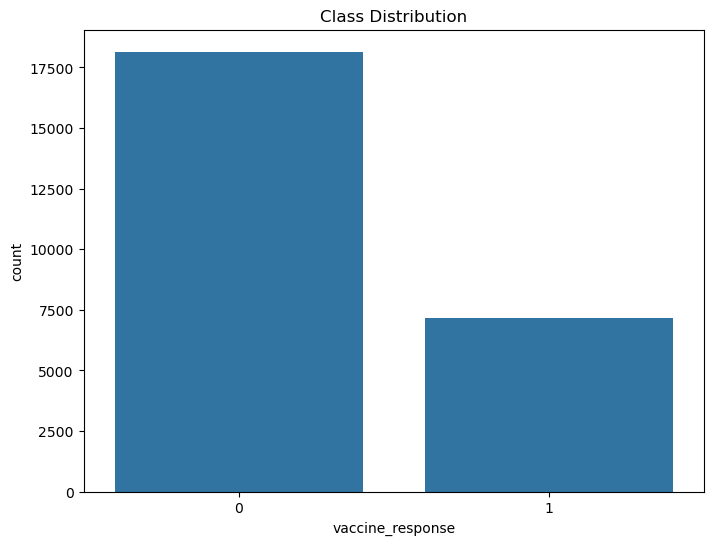

In [56]:
plt.figure(figsize=(8, 6))
sns.countplot(x='vaccine_response', data=fluprint_clean)
plt.title('Class Distribution')
plt.show()

In [57]:
result = fluprint_clean[fluprint_clean['data'].isna()]
len(result)

0

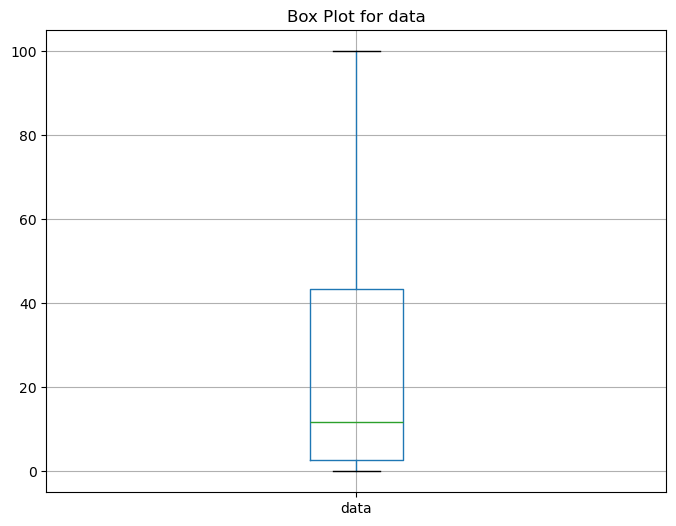

In [58]:
plt.figure(figsize=(8, 6))
fluprint_clean.boxplot(column=['data'])
plt.title('Box Plot for data')
plt.show()

In [59]:
fluprint_clean

,donor_id,vaccine_response,name_formatted,subset,units,data
0,813,0,B_cells,CD14-CD33-/CD3-/CD19+CD20+,% of Parent,34.40
1,813,0,basophils,CD123+HLADR-,% of Parent,1.45
2,813,0,CD16_pos_monocytes,CD14+CD33+/CD16+,% of Parent,5.85
3,813,0,CD16_pos_CD14_pos_monocytes,CD14+CD33+/CD14+CD16+,% of Parent,1.55
4,813,0,CD16_pos_CD14_neg_monocytes,CD14+CD33+/CD14-CD16+,% of Parent,4.46
...,...,...,...,...,...,...
155845,3,0,Th2_non_neg_TFH_CD8_pos_T_cells,CD14-CD33-/CD3+/CD4-CD8+/Non-naive CD8+/CXCR5-...,% of Parent,9.71
155846,3,0,Th2_TFH_CD4_pos_T_cells,CD14-CD33-/CD3+/CD4+CD8-/Non-naive CD4+/CXCR5+...,% of Parent,34.90
155847,3,0,Th2_TFH_CD8_pos_T_cells,CD14-CD33-/CD3+/CD4-CD8+/Non-naive CD8+/CXCR5+...,% of Parent,1.84
155848,3,0,transitional_B_cells,CD14-CD33-/CD3-/CD19+CD20+/CD24+CD38+,% of Parent,6.51


In [66]:
fluprint_clean['donor_id'] = fluprint_data['donor_id'].astype('object')

C:\Users\indra\AppData\Local\Temp\ipykernel_21116\3269896144.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fluprint_clean['donor_id'] = fluprint_data['donor_id'].astype('object')


In [62]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("\nClass distribution after SMOTE:")
print(pd.Series(y_train_resampled).value_counts(normalize=True))

ValueError: could not convert string to float: 'CD161_pos_NK_cells'

In [68]:
fluprint_clean.dtypes

donor_id             object
vaccine_response      int64
name_formatted       object
subset               object
units                object
data                float64
dtype: object

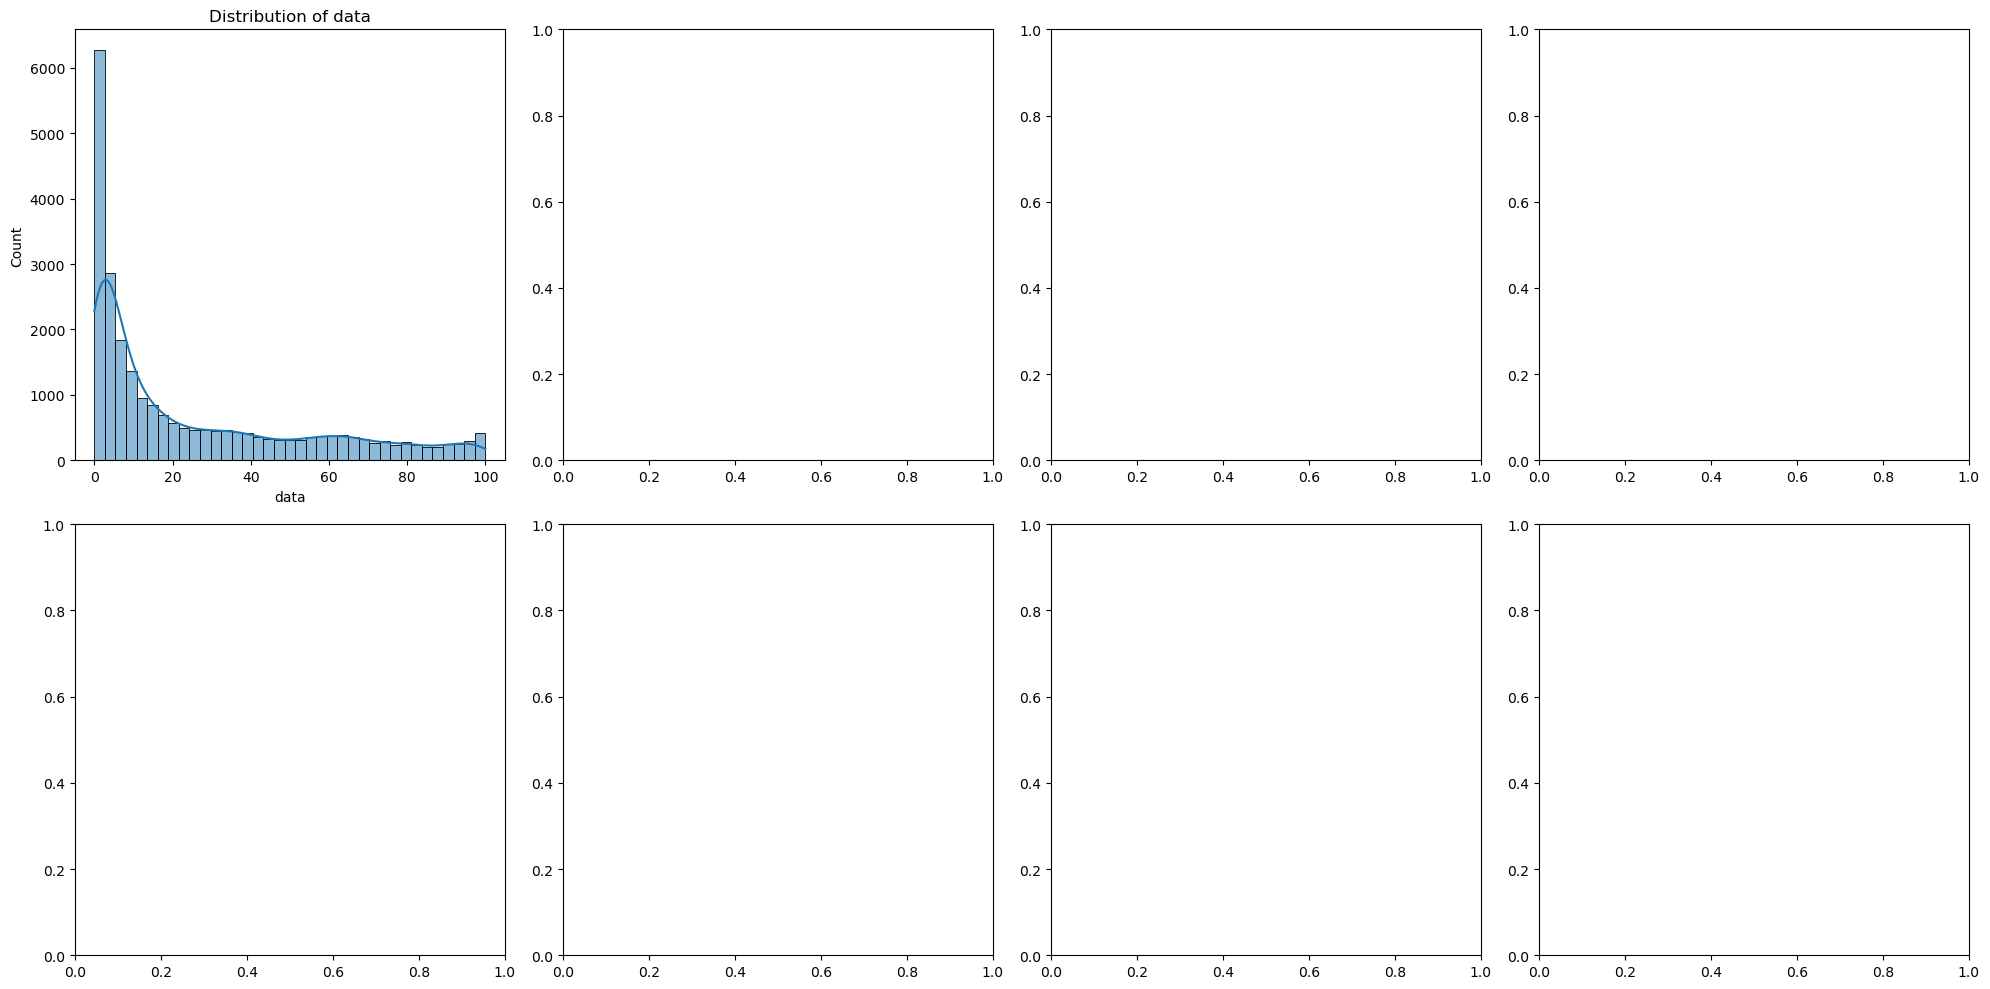

In [74]:
#4. Exploratory Data Analysis (EDA): Distribution of Numerical Features
numeric_cols = fluprint_clean.select_dtypes(include=['float64']).columns.tolist()

fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    sns.histplot(fluprint_clean[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

In [76]:
plt.figure(figsize=(12, 10))
sns.heatmap(fluprint_clean.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

ValueError: could not convert string to float: 'B_cells'

<Figure size 1200x1000 with 0 Axes>

In [78]:
# Find duplicates
duplicates = fluprint_clean[fluprint_clean.duplicated(subset=['donor_id', 'name_formatted'], keep=False)]
print(duplicates)

# Remove the duplicates
fluprint_clean_unique = fluprint_clean.drop_duplicates(subset=['donor_id', 'name_formatted'])
print(fluprint_clean_unique)

      donor_id  vaccine_response       name_formatted  \
88836      325                 0              B_cells   
88837      325                 0              B_cells   
88838      325                 0              B_cells   
88847      325                 0  CD3_neg_lymphocytes   
88848      325                 0  CD3_neg_lymphocytes   
...        ...               ...                  ...   
98141      263                 0              T_cells   
98142      263                 0              T_cells   
98143      263                 0              T_cells   
98144      263                 0              T_cells   
98145      263                 0              T_cells   

                                 subset        units  data  
88836     B cell: Lymph/CD3-/CD19+CD20+  % of Parent  40.4  
88837  CXCR3 FMO: Lymph/CD3-/CD19+CD20+  % of Parent  58.3  
88838      CXCR3: Lymph/CD3-/CD19+CD20+  % of Parent  49.6  
88847                B cell: Lymph/CD3-  % of Parent  15.2  
88848     

In [80]:
pivoted_df = fluprint_clean_unique.pivot(index='donor_id', columns='name_formatted', values='data')

In [84]:
vaccine_response = fluprint_data.drop_duplicates(subset=['donor_id', 'vaccine_response'])[['donor_id', 'vaccine_response']]
vaccine_response = vaccine_response.dropna()

In [86]:
merged = vaccine_response.merge(pivoted_df, on='donor_id')

In [88]:
# Calculate pairwise correlation coefficients between numerical columns in 'merged'
correlation = merged.corr()

# Sort correlations of 'vaccine_response' with other features
corr_response = correlation['vaccine_response'].sort_values(ascending=False)

# Display the most positively and negatively correlated features
print(corr_response.head())
print(corr_response.tail())

vaccine_response             1.000000
IL_neg_21_CD4_pos_T_cells    0.520964
Unstim_CD4_pos_T_cells       0.518184
PMA_Iono_CD4_pos_T_cells     0.516098
LPS_CD4_pos_T_cells          0.506828
Name: vaccine_response, dtype: float64
IL_neg_7_CD8_pos_T_cells    -0.593862
IL_neg_21_CD8_pos_T_cells   -0.594105
PMA_Iono_CD8_pos_T_cells    -0.594758
LPS_CD8_pos_T_cells         -0.599727
Unstim_CD8_pos_T_cells      -0.605982
Name: vaccine_response, dtype: float64


In [90]:
non_na_counts = merged.notna().sum()
print(non_na_counts)

donor_id                      304
vaccine_response              304
B_cells                       294
CD161_neg_CD45RA_pos_Tregs    294
CD161_pos_CD45RA_neg_Tregs    294
                             ... 
naive_CD4_pos_T_cells         294
naive_CD8_pos_T_cells         294
pDCs                          164
plasmablasts                  294
transitional_B_cells          294
Length: 413, dtype: int64


In [92]:
combined_df = pd.DataFrame({
    'Corr_response': corr_response,
    'Non_Na_Counts': non_na_counts
})

# Sort by correlation values 
combined_df = combined_df.sort_values(by='Corr_response', ascending=False)
print(combined_df)

                           Corr_response  Non_Na_Counts
vaccine_response                1.000000            304
IL_neg_21_CD4_pos_T_cells       0.520964             18
Unstim_CD4_pos_T_cells          0.518184             18
PMA_Iono_CD4_pos_T_cells        0.516098             18
LPS_CD4_pos_T_cells             0.506828             18
...                                  ...            ...
IL_neg_7_CD8_pos_T_cells       -0.593862             18
IL_neg_21_CD8_pos_T_cells      -0.594105             18
PMA_Iono_CD8_pos_T_cells       -0.594758             18
LPS_CD8_pos_T_cells            -0.599727             18
Unstim_CD8_pos_T_cells         -0.605982             18

[413 rows x 2 columns]


In [94]:
# Apply the filter conditions 
filtered_df = combined_df[((combined_df['Non_Na_Counts'] > 290) & (combined_df['Corr_response'].abs() > 0.1)) | (combined_df['Non_Na_Counts'] == 304)] 

# Display all rows of the DataFrame 
with pd.option_context('display.max_rows', None): 
    print(filtered_df) 

                                    Corr_response  Non_Na_Counts
vaccine_response                         1.000000            304
CD161_pos_CD45RA_pos_Tregs               0.263836            294
CD85j_pos_CD4_pos_T_cells                0.174133            294
T_cells                                  0.139733            294
CD161_pos_CD45RA_neg_Tregs               0.120417            294
donor_id                                -0.015260            304
central_memory_CD8_pos_T_cells          -0.101233            294
plasmablasts                            -0.106176            294
HLADR_pos_CD38_pos_CD8_pos_T_cells      -0.109893            294
HLADR_neg_CD38_pos_CD8_pos_T_cells      -0.117639            293
HLADR_pos_CD38_pos_CD4_pos_T_cells      -0.131227            294
HLADR_neg_CD38_pos_CD4_pos_T_cells      -0.141555            294


In [96]:
# Extract names from the index
relevant_cells = filtered_df.index.tolist() 

# Filter the pivoted dataframe using these names
df = merged[relevant_cells] 

In [98]:
df['vaccine_response'].value_counts()

vaccine_response
0    215
1     89
Name: count, dtype: int64

In [100]:
y = df.vaccine_response

In [102]:
flu_features = ['CD161_pos_CD45RA_pos_Tregs',
       'CD85j_pos_CD4_pos_T_cells', 'T_cells', 'CD161_pos_CD45RA_neg_Tregs', 'central_memory_CD8_pos_T_cells', 'plasmablasts',
       'HLADR_pos_CD38_pos_CD8_pos_T_cells',
       'HLADR_neg_CD38_pos_CD8_pos_T_cells',
       'HLADR_pos_CD38_pos_CD4_pos_T_cells',
       'HLADR_neg_CD38_pos_CD4_pos_T_cells']
X = df[flu_features]

In [104]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Split the data into training and validation datasets
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=0)

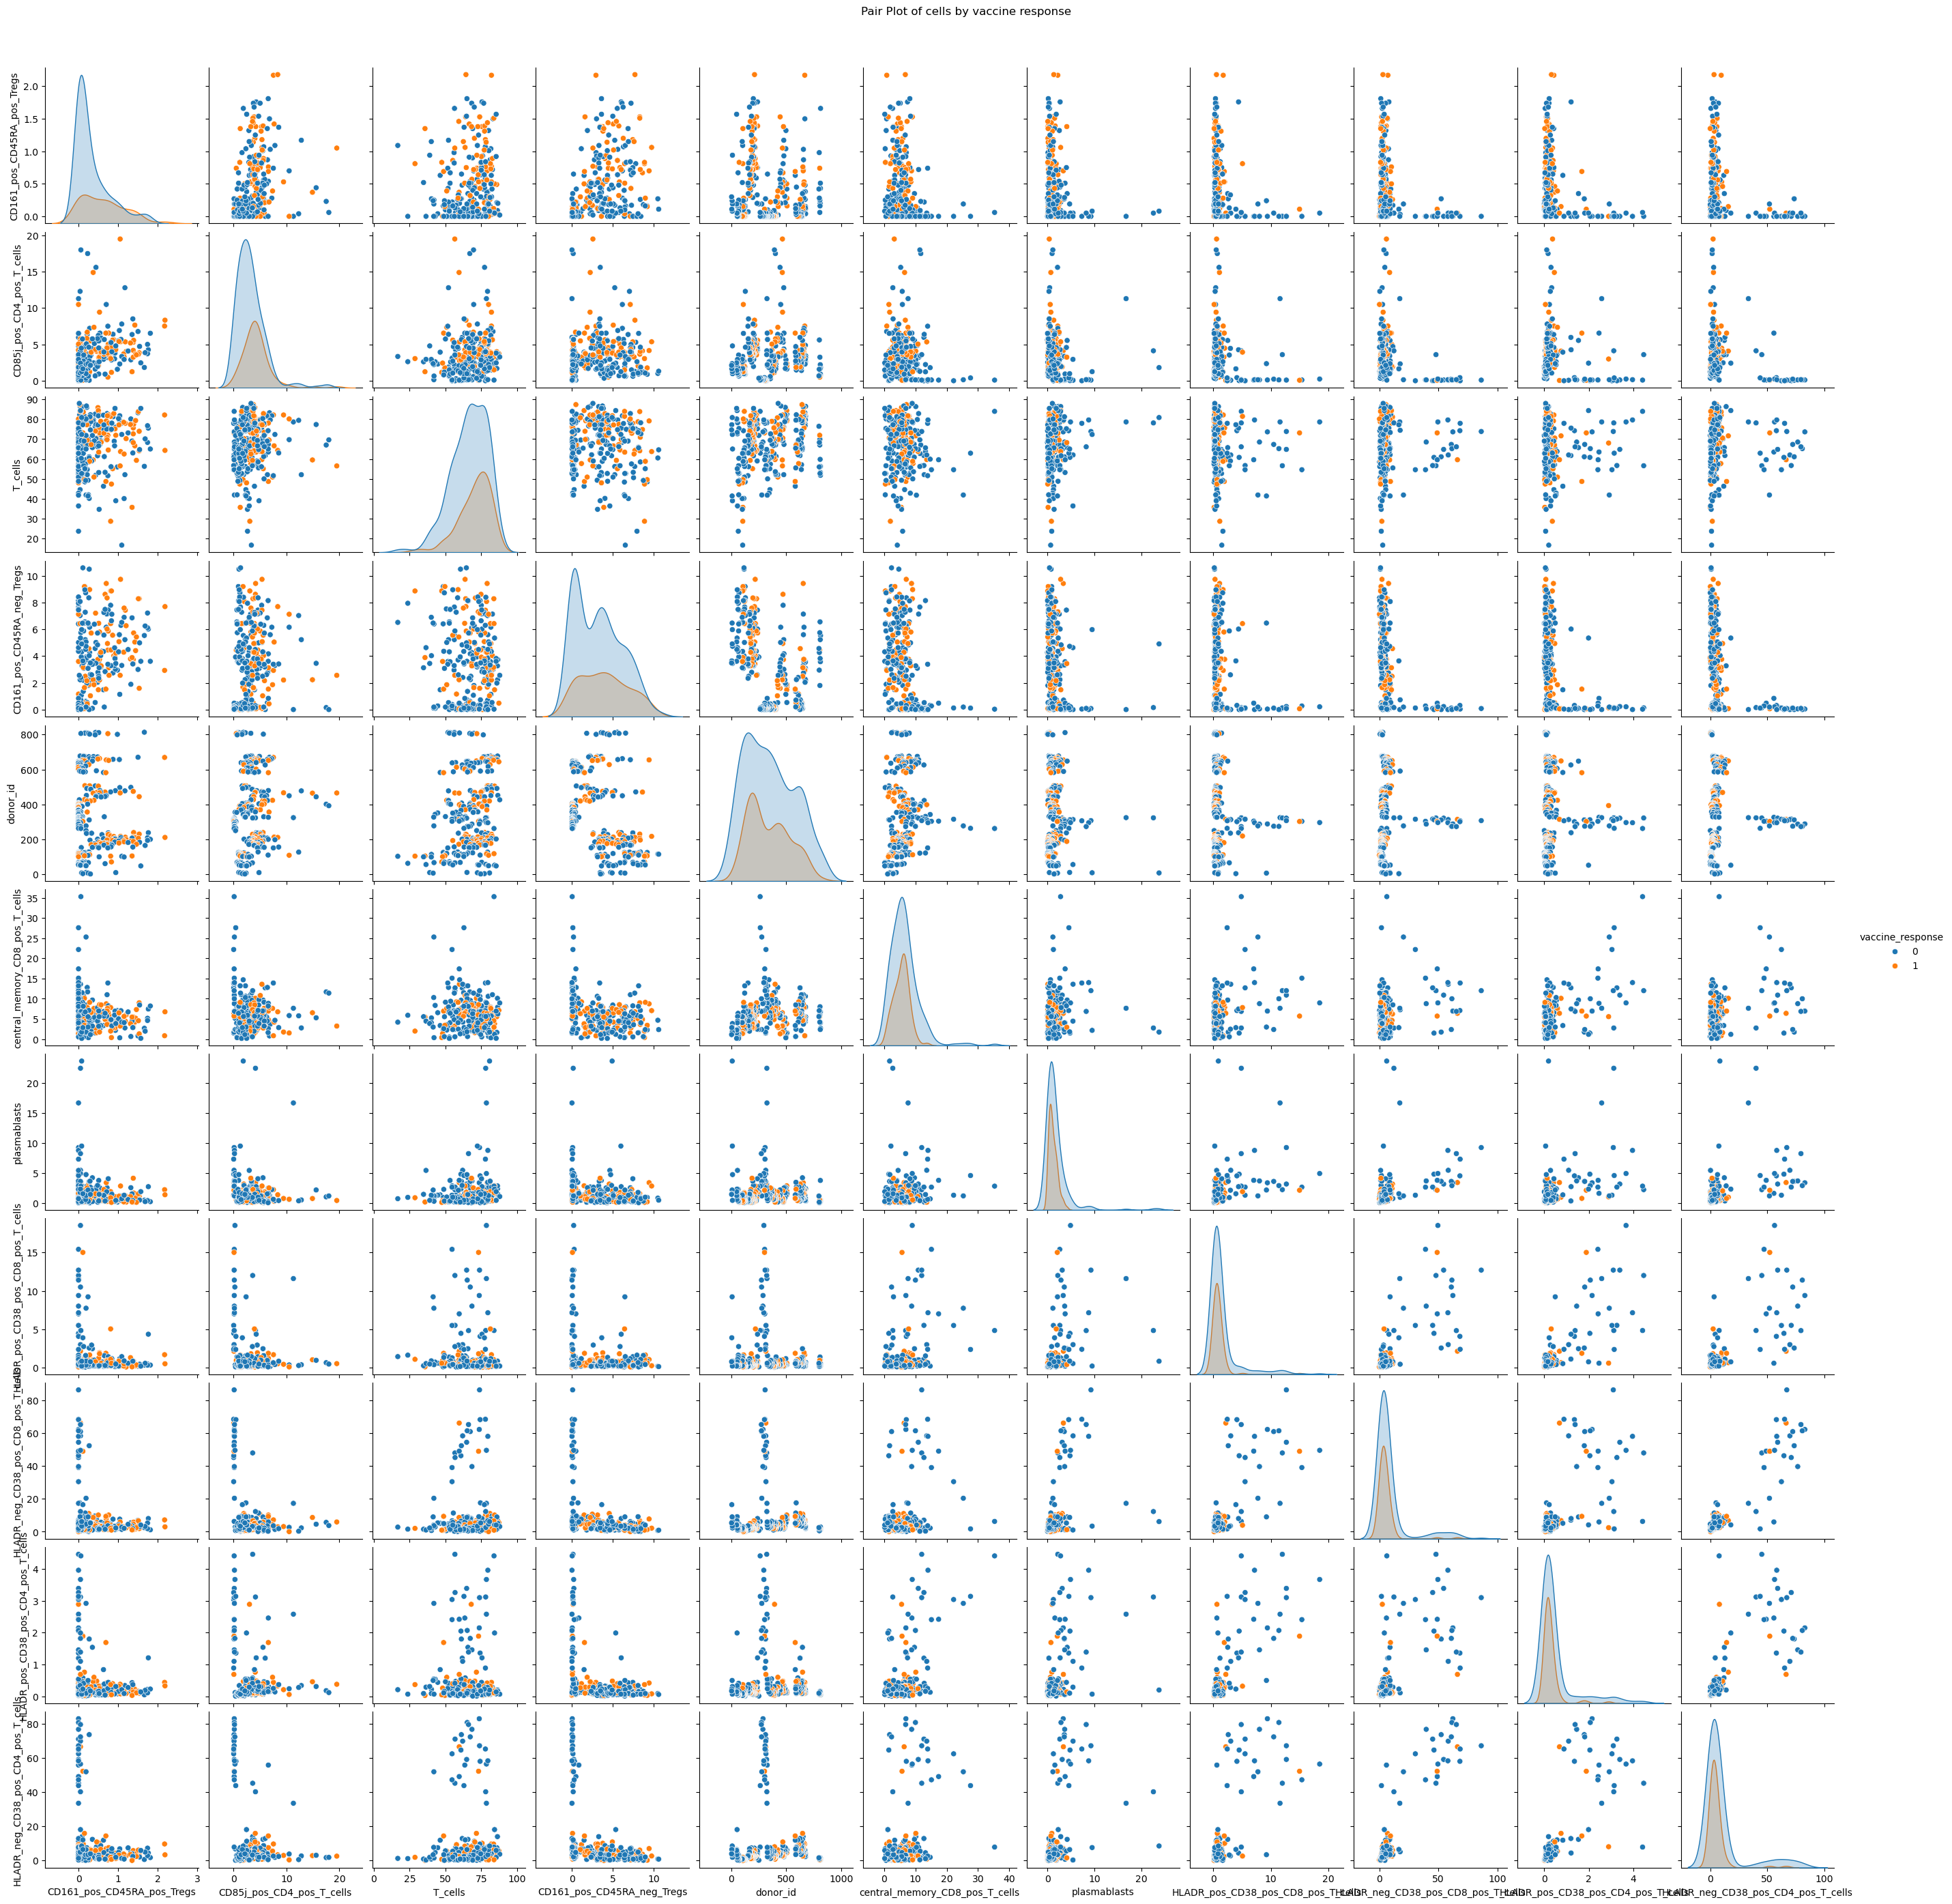

In [110]:
sns.pairplot(df, hue='vaccine_response', diag_kind='kde')
plt.suptitle('Pair Plot of cells by vaccine response', y=1.02)
plt.show()

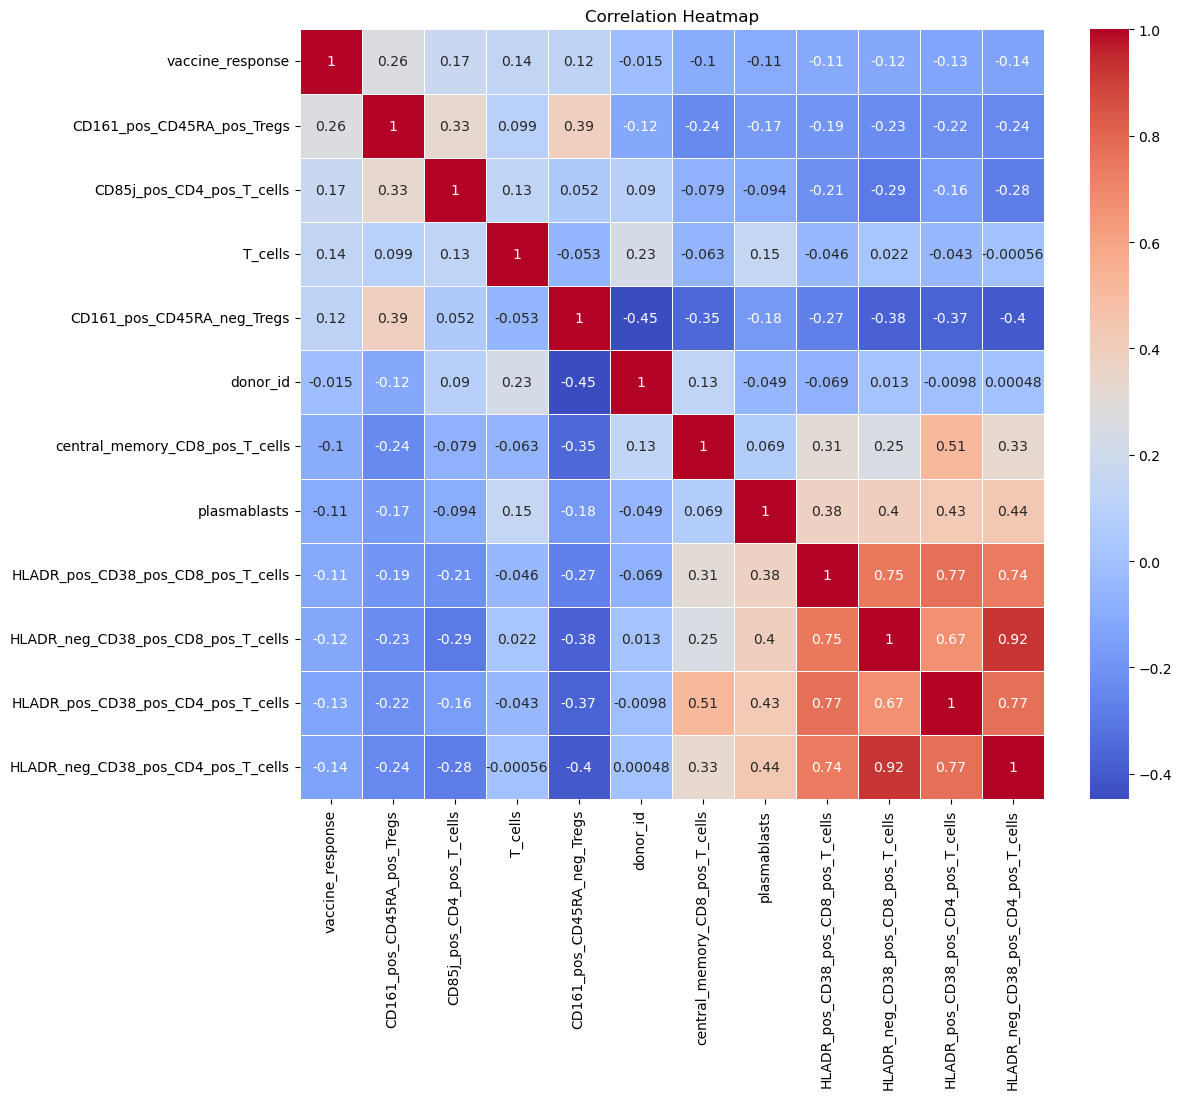

In [111]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [114]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
train_X_resampled, train_y_resampled = smote.fit_resample(train_X, train_y)

print("\nClass distribution after SMOTE:")
print(pd.Series(train_y_resampled).value_counts(normalize=True))

ValueError: Input X contains NaN.
SMOTE does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [116]:
na_counts = df.isna().sum()
print(na_counts)

vaccine_response                       0
CD161_pos_CD45RA_pos_Tregs            10
CD85j_pos_CD4_pos_T_cells             10
T_cells                               10
CD161_pos_CD45RA_neg_Tregs            10
donor_id                               0
central_memory_CD8_pos_T_cells        10
plasmablasts                          10
HLADR_pos_CD38_pos_CD8_pos_T_cells    10
HLADR_neg_CD38_pos_CD8_pos_T_cells    11
HLADR_pos_CD38_pos_CD4_pos_T_cells    10
HLADR_neg_CD38_pos_CD4_pos_T_cells    10
dtype: int64


In [132]:
df_clean = df.dropna()
print(df_clean)

     vaccine_response  CD161_pos_CD45RA_pos_Tregs  CD85j_pos_CD4_pos_T_cells  \
0                   0                        1.66                       1.84   
1                   0                        0.43                       0.76   
2                   0                        0.51                       0.94   
3                   0                        0.17                       2.22   
4                   0                        0.20                       1.65   
..                ...                         ...                        ...   
299                 0                        0.08                       1.26   
300                 0                        0.08                       1.82   
301                 0                        0.24                       2.36   
302                 0                        0.11                       1.65   
303                 0                        0.30                       2.13   

     T_cells  CD161_pos_CD45RA_neg_Treg

In [134]:
y = df_clean.vaccine_response


In [136]:
flu_features = ['CD161_pos_CD45RA_pos_Tregs',
       'CD85j_pos_CD4_pos_T_cells', 'T_cells', 'CD161_pos_CD45RA_neg_Tregs', 'central_memory_CD8_pos_T_cells', 'plasmablasts',
       'HLADR_pos_CD38_pos_CD8_pos_T_cells',
       'HLADR_neg_CD38_pos_CD8_pos_T_cells',
       'HLADR_pos_CD38_pos_CD4_pos_T_cells',
       'HLADR_neg_CD38_pos_CD4_pos_T_cells']
X = df_clean[flu_features]

In [138]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Split the data into training and validation datasets
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=0)

In [140]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
train_X_resampled, train_y_resampled = smote.fit_resample(train_X, train_y)

print("\nClass distribution after SMOTE:")
print(pd.Series(train_y_resampled).value_counts(normalize=True))


Class distribution after SMOTE:
vaccine_response
0    0.5
1    0.5
Name: proportion, dtype: float64


In [142]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_X_resampled = scaler.fit_transform(train_X_resampled)
val_X = scaler.transform(val_X)

In [146]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

# Apply RFE to Logistic Regression model
model = LogisticRegression(max_iter=500, solver='lbfgs')
rfe = RFE(estimator=model, n_features_to_select=10)
rfe.fit(train_X_resampled, train_y_resampled)

# Selected features
selected_features = X.columns[rfe.support_].tolist()
print("Selected features:", selected_features)

# Transform datasets
X_train_selected = rfe.transform(train_X_resampled)
X_test_selected = rfe.transform(val_X)

Selected features: ['CD161_pos_CD45RA_pos_Tregs', 'CD85j_pos_CD4_pos_T_cells', 'T_cells', 'CD161_pos_CD45RA_neg_Tregs', 'central_memory_CD8_pos_T_cells', 'plasmablasts', 'HLADR_pos_CD38_pos_CD8_pos_T_cells', 'HLADR_neg_CD38_pos_CD8_pos_T_cells', 'HLADR_pos_CD38_pos_CD4_pos_T_cells', 'HLADR_neg_CD38_pos_CD4_pos_T_cells']


In [148]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Logistic Regression
lr_model = LogisticRegression(max_iter=500, solver='lbfgs')
lr_scores = cross_val_score(lr_model, X_train_selected, train_y_resampled, cv=5, scoring='roc_auc')
print(f'Logistic Regression CV AUC: {lr_scores.mean():.2f} ± {lr_scores.std():.2f}')

# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_scores = cross_val_score(rf_model, X_train_selected,train_y_resampled, cv=5, scoring='roc_auc')
print(f'Random Forest CV AUC: {rf_scores.mean():.2f} ± {rf_scores.std():.2f}')

# Support Vector Machine
svm_model = SVC(probability=True)
svm_scores = cross_val_score(svm_model, X_train_selected, train_y_resampled, cv=5, scoring='roc_auc')
print(f'SVM CV AUC: {svm_scores.mean():.2f} ± {svm_scores.std():.2f}')

Logistic Regression CV AUC: 0.74 ± 0.05
Random Forest CV AUC: 0.87 ± 0.04
SVM CV AUC: 0.74 ± 0.06


In [150]:
rf_model.fit(X_train_selected, train_y_resampled)

RandomForestClassifier(random_state=42)

In [160]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train_selected, train_y_resampled)

print(f'Best parameters: {grid_search.best_params_}')
print(f'Best cross-validation AUC: {grid_search.best_score_:.2f}')

Best parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Best cross-validation AUC: 0.88


              precision    recall  f1-score   support

           0       0.77      0.66      0.71        50
           1       0.45      0.58      0.51        24

    accuracy                           0.64        74
   macro avg       0.61      0.62      0.61        74
weighted avg       0.67      0.64      0.64        74



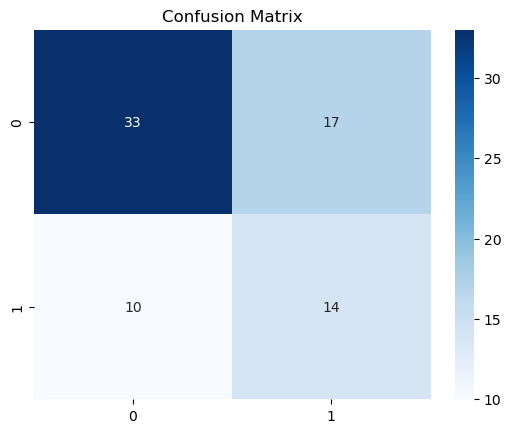

ROC-AUC Score: 0.68


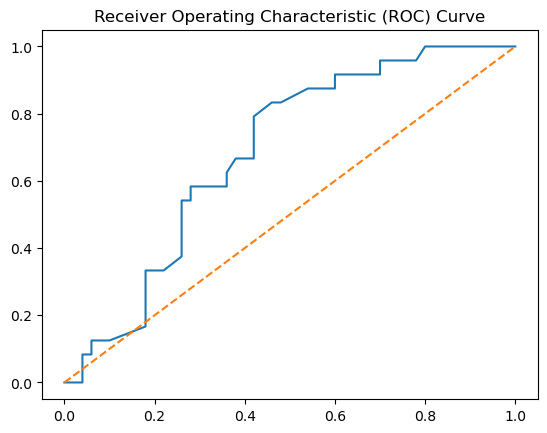

F1 Score: 0.51


In [166]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve, f1_score

# Predictions
y_pred = rf_model.predict(X_test_selected)
y_proba = rf_model.predict_proba(X_test_selected)[:, 1]

# Classification report
print(classification_report(val_y, y_pred))

# Confusion matrix
cm = confusion_matrix(val_y, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

# ROC-AUC Score
roc_auc = roc_auc_score(val_y, y_proba)
print(f'ROC-AUC Score: {roc_auc:.2f}')

# ROC Curve
fpr, tpr, _ = roc_curve(val_y, y_proba)
plt.plot(fpr, tpr, label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.show()

# F1 Score
f1 = f1_score(val_y, y_pred)
print(f'F1 Score: {f1:.2f}')